## 🌾 Irrigation Prediction Model

In [ ]:
# load the required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import matplotlib.pyplot as plt



In [ ]:

# 1️⃣ Load Data
final_df = pd.read_csv("/content/farming_data.csv")


In [ ]:
# 2️⃣ Irrigation Logic Function


def determine_irrigation_need(row):
    crop = row['crop_type']
    moisture = row['soil_moisture']
    rainfall = row['rainfall']
    temp = row['temperature']
    humidity = row['humidity']
    sunlight = row['sunlight_intensity']

    # Base thresholds per crop (in %)
    thresholds = {
        'Potato': 60,
        'Olive': 25,
        'Barley': 25,
        'Wheat': 20,
        'Tomato': 30,
        'Onion': 25,
        'Corn': 25,
        'Dates': 20,
        'Peanuts': 30,
        'Rice': 40
    }

    threshold = thresholds.get(crop, 25)

    # Adjust based on weather
    if temp > 30:
        threshold += 3  # Hotter → more water
    if humidity < 40:
        threshold += 2  # Drier → more water
    if sunlight > 800:
        threshold += 2  # High solar → more water

    # Skip irrigation if raining recently
    if rainfall > 2:
        return 0  # No irrigation needed

    return int(moisture < threshold)



In [ ]:
final_df

,sensor_id,farm_id,crop_type,region,date,year,month,day,week,hour,minute,second,soil_moisture,soil_pH,temperature,rainfall,humidity,sunlight_intensity,pesticide_usage_ml,irrigation_needed
0,384208af-e94a-581e-87af-0fec25e48ffe,10,Potato,Sinai,2024-01-02,2024,1,2,1,14,32,0,58.28,7.670000,28.81,0.0,46.92,7.75,0.0,1
1,b00dd3cc-581f-58c8-b2ba-f731f543522d,10,Potato,Sinai,2024-01-02,2024,1,2,1,14,33,0,57.89,7.670000,28.69,0.0,46.64,7.75,0.0,1
2,1882dc1a-a233-5ae8-819b-0582e7b86ded,10,Potato,Sinai,2024-01-02,2024,1,2,1,14,34,0,57.79,7.680000,28.99,0.0,47.86,7.75,0.0,1
3,b7e12a2a-aff1-50a4-8417-c2568aee4bc9,10,Potato,Sinai,2024-01-02,2024,1,2,1,14,35,0,57.48,7.660000,29.09,0.0,45.90,7.75,0.0,1
4,989f7ac7-439e-5808-b44a-2530dddbe1d9,10,Potato,Sinai,2024-01-02,2024,1,2,1,14,36,0,57.15,7.650000,28.92,0.0,49.01,7.75,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10189,90cf9779-b2c8-5d1d-8487-7938c03dc115,3,Onion,NileDelta,2024-01-09,2024,1,9,2,9,26,0,64.97,7.400000,27.64,0.0,49.57,6.05,0.0,0
10190,bf33bb2d-faf6-5651-96d0-2d2536307617,8,Olive,Sinai,2024-01-04,2024,1,4,1,18,13,0,73.00,7.570000,20.55,0.0,55.54,1.32,0.0,0
10191,f80bb3aa-5c1a-59ff-8df9-5ab99cb4be67,5,Dates,UpperEgypt,2024-01-06,2024,1,6,1,9,31,0,75.52,7.590000,26.76,0.0,49.79,5.97,0.0,0
10192,ac9e4d67-5889-51a2-8672-af7c18b9c651,9,Barley,Sinai,2024-01-03,2024,1,3,1,14,26,0,76.91,7.650000,29.39,0.0,48.16,7.79,0.0,0


In [ ]:
# 4️⃣ Handle Missing Values
final_df = final_df.dropna(subset=['soil_moisture', 'temperature', 'humidity', 'rainfall', 'sunlight_intensity', 'soil_pH'])
final_df.fillna(final_df.median(numeric_only=True), inplace=True)


In [ ]:
# 5️⃣ Feature Selection

features = ['soil_moisture', 'temperature', 'humidity', 'rainfall', 'sunlight_intensity', 'soil_pH']
target = 'irrigation_needed'

X = final_df[features]
y = final_df[target]


In [ ]:
# 6️⃣ Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
# 7️⃣ Train Model
from xgboost import XGBClassifier
model = XGBClassifier(scale_pos_weight=len(y_train[y_train==0])/len(y_train[y_train==1]))
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
# 8️⃣ Evaluate Model
y_pred = model.predict(X_test)

print("\n✅ Model Evaluation Results:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



✅ Model Evaluation Results:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1020
           1       0.94      0.97      0.96      1019

    accuracy                           0.95      2039
   macro avg       0.96      0.95      0.95      2039
weighted avg       0.96      0.95      0.95      2039


Confusion Matrix:
[[954  66]
 [ 26 993]]


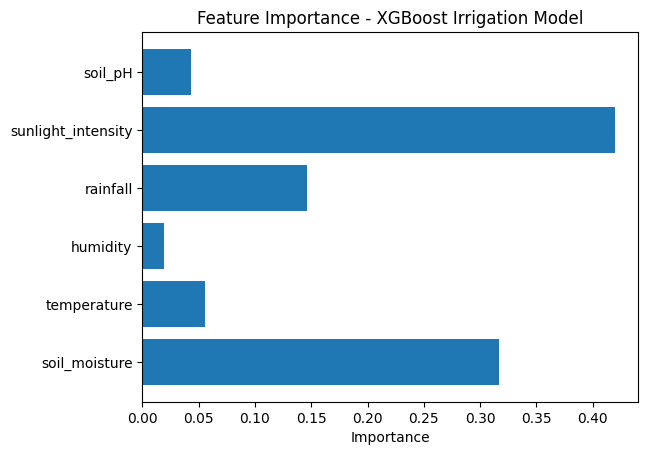

In [ ]:
# Feature Importance
import matplotlib.pyplot as plt
import pandas as pd

importance = model.feature_importances_
plt.barh(X_train.columns, importance)
plt.title("Feature Importance - XGBoost Irrigation Model")
plt.xlabel("Importance")
plt.show()


In [ ]:
# 🔟 Save Model for Deployment
joblib.dump(model, "irrigation_model.pkl")
print("\n🚀 Model saved as 'irrigation_model.pkl'")



🚀 Model saved as 'irrigation_model.pkl'


In [ ]:
sample = pd.DataFrame([{
    "soil_moisture": 24,
    "temperature": 34,
    "humidity": 30,
    "rainfall": 0,
    "sunlight_intensity": 900,
    "soil_pH": 6.2
}])
prediction = model.predict(sample)[0]
print("Prediction →", "Irrigation Needed" if prediction == 1 else "No Irrigation")


Prediction → Irrigation Needed


In [ ]:
sample = pd.DataFrame([{
    "soil_moisture": 22,
    "temperature": 36,
    "humidity": 25,
    "rainfall": 0,
    "sunlight_intensity": 950,
    "soil_pH": 6.5
}])

prediction = model.predict(sample)[0]
print("Prediction →", "Irrigation Needed" if prediction == 1 else "No Irrigation")



Prediction → Irrigation Needed


In [ ]:
sample = pd.DataFrame([{
    "soil_moisture": 50,
    "temperature": 30,
    "humidity": 20,
    "rainfall": 0,
    "sunlight_intensity": 400,
    "soil_pH": 6.5
}])

proba = model.predict_proba(sample)[0][1]
pred = model.predict(sample)[0]
print(f"Prediction: {'Irrigation Needed' if pred==1 else 'No Irrigation'} (Confidence {proba:.2f})")


Prediction: Irrigation Needed (Confidence 1.00)


In [ ]:
sample = pd.DataFrame([{
    "soil_moisture": 18,
    "temperature": 37,
    "humidity": 25,
    "rainfall": 0,
    "sunlight_intensity": 970,
    "soil_pH": 6.5,
    "crop_type": le.transform(["Tomato"])[0]
}])

pred = model.predict(sample)[0]
proba = model.predict_proba(sample)[0][1]

print(f"Prediction → {'Irrigation Needed' if pred == 1 else 'No Irrigation'} (Confidence: {proba:.2f})")


Prediction → No Irrigation (Confidence: 0.00)
